In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

In [23]:
dataset = pd.read_csv("../../datasets/dataset.csv")
dataset

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

In [22]:
dataset.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,284142.000000,284142.000000,192808.000000,192808.000000,192597.000000,192597.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,25.213484,25.213484,24.290016,26.156408,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,15.900000,15.900000,12.600000,19.700000,19.000000
50%,2019.000000,2019.000000,32.800000,32.800000,27.000000,38.900000,34.000000
75%,2021.000000,2021.000000,56.900000,56.900000,49.400000,64.600000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


### Handling Missing Values

In [11]:
# Drop unnecessary columns 
data_cleaned = dataset.drop(columns=['RowId','ClassID','TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationCategoryID2'])

# Handling the missing values
data_cleaned['Data_Value'] = data_cleaned['Data_Value'].fillna(data_cleaned['Data_Value'].median())

# # Standardize 'Data_Value'
# scaler = StandardScaler()
# data_cleaned['Data_Value'] = scaler.fit_transform(data_cleaned[['Data_Value']])

# Convert YearStart and YearEnd to datetime
data_cleaned['YearStart'] = pd.to_datetime(data_cleaned['YearStart'], format='%Y')
data_cleaned['YearEnd'] = pd.to_datetime(data_cleaned['YearEnd'],format='%Y')


data_cleaned = data_cleaned.drop_duplicates()

In [12]:
# Check for missing values 
missing_summary = data_cleaned.isnull().sum().reset_index()

# Calcualting the percentage of null value in each columns
missing_summary.columns = ['Columns','Missing_Count']
missing_summary['Missing_Percentage'] = (missing_summary['Missing_Count'] / len(data_cleaned)) * 100

# print(missing_summary)
# Process missing values
columns_to_drop = missing_summary[missing_summary['Missing_Percentage'] > 60]['Columns']
data_cleaned = data_cleaned.drop(columns=columns_to_drop,axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   YearStart                284142 non-null  datetime64[ns]
 1   YearEnd                  284142 non-null  datetime64[ns]
 2   LocationAbbr             284142 non-null  object        
 3   LocationDesc             284142 non-null  object        
 4   Datasource               284142 non-null  object        
 5   Class                    284142 non-null  object        
 6   Topic                    284142 non-null  object        
 7   Question                 284142 non-null  object        
 8   Data_Value_Unit          284142 non-null  object        
 9   DataValueTypeID          284142 non-null  object        
 10  Data_Value_Type          284142 non-null  object        
 11  Data_Value               284142 non-null  float64       
 12  Data_Value_Alt  

In [21]:
# Starting the analysis with the number of patients reported each year

yearly_data_start = data_cleaned['YearStart'].value_counts()
yearly_data_end = data_cleaned['YearEnd'].value_counts()

print(yearly_data_start.index)
print(yearly_data_end.index)
# Combine both counts into a single dataframe
yearly_data = pd.concat([yearly_data_start, yearly_data_end], axis=0).groupby(level=0).sum()

# Convert the series to a DataFrame
yearly_data = yearly_data.reset_index()
yearly_data.columns = ['Year', 'TotalReported']
print(yearly_data)

DatetimeIndex(['2021-01-01', '2019-01-01', '2022-01-01', '2020-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='YearStart', freq=None)
DatetimeIndex(['2022-01-01', '2021-01-01', '2020-01-01', '2015-01-01',
               '2019-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='YearEnd', freq=None)
        Year  TotalReported
0 2015-01-01          70040
1 2016-01-01          68290
2 2017-01-01          66858
3 2018-01-01          61096
4 2019-01-01          72839
5 2020-01-01          70620
6 2021-01-01          78428
7 2022-01-01          80113


## Visualizing the data

In [14]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.dropna()
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                       YearStart   YearEnd  Data_Value  Data_Value_Alt  \
YearStart               1.000000  0.987367    0.025274        0.025274   
YearEnd                 0.987367  1.000000    0.019179        0.019179   
Data_Value              0.025274  0.019179    1.000000        1.000000   
Data_Value_Alt          0.025274  0.019179    1.000000        1.000000   
Low_Confidence_Limit    0.020080  0.011352    0.984163        0.984163   
High_Confidence_Limit   0.030091  0.026987    0.984066        0.984066   
LocationID             -0.001113  0.000212   -0.008128       -0.008128   

                       Low_Confidence_Limit  High_Confidence_Limit  LocationID  
YearStart                          0.020080               0.030091   -0.001113  
YearEnd                            0.011352               0.026987    0.000212  
Data_Value                         0.984163               0.984066   -0.008128  
Data_Value_Alt                     0.984163               0.984066   -0.008128  
Lo

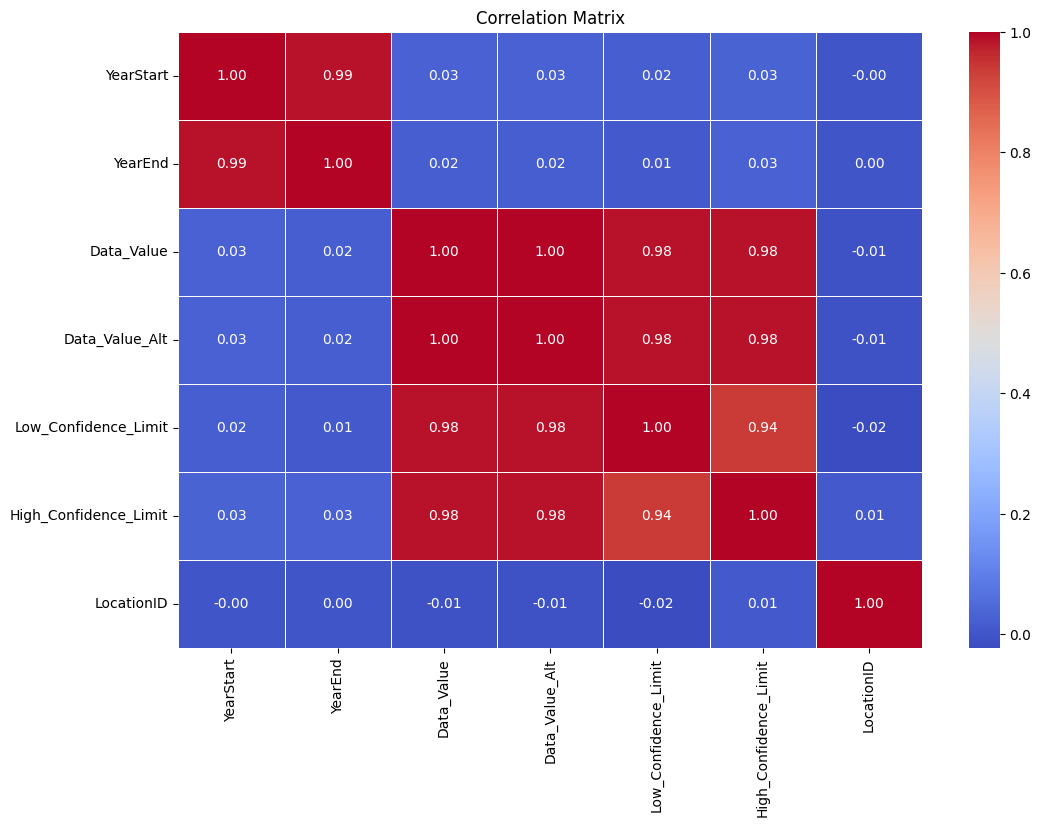

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [16]:
# # Calculate correlation matrix
# corr = data_cleaned.corr()

# # Visualize correlation
# plt.figure(figsize=(10,8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

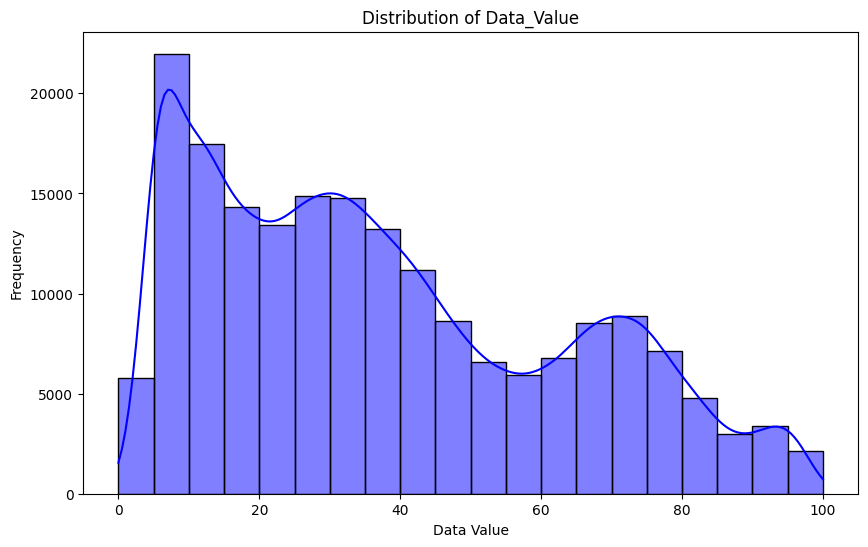

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Data_Value'], kde=True, bins=20, color='blue')
plt.title('Distribution of Data_Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

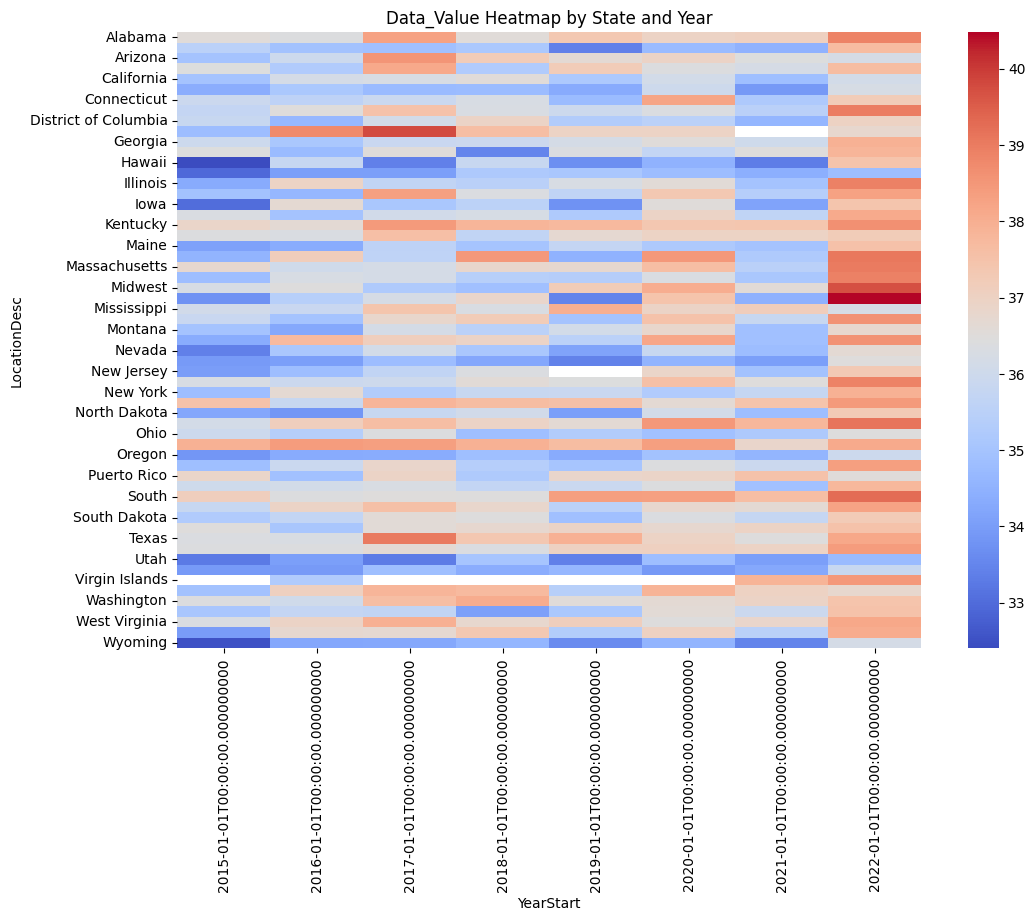

In [18]:
# Heatmap of Data_Value by State and Year
pivot_table = data_cleaned.pivot_table(index='LocationDesc', columns='YearStart', values='Data_Value', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Data_Value Heatmap by State and Year')
plt.show()

In [19]:
# kmeans = KMeans(n_clusters=3, random_state=42)
# data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned[['Data_Value']].dropna())
# sns.scatterplot(data=data_cleaned, x='Longitude', y='Latitude', hue='Cluster', palette='viridis')
# plt.title('Clusters of States Based on Data_Value')
# plt.show()

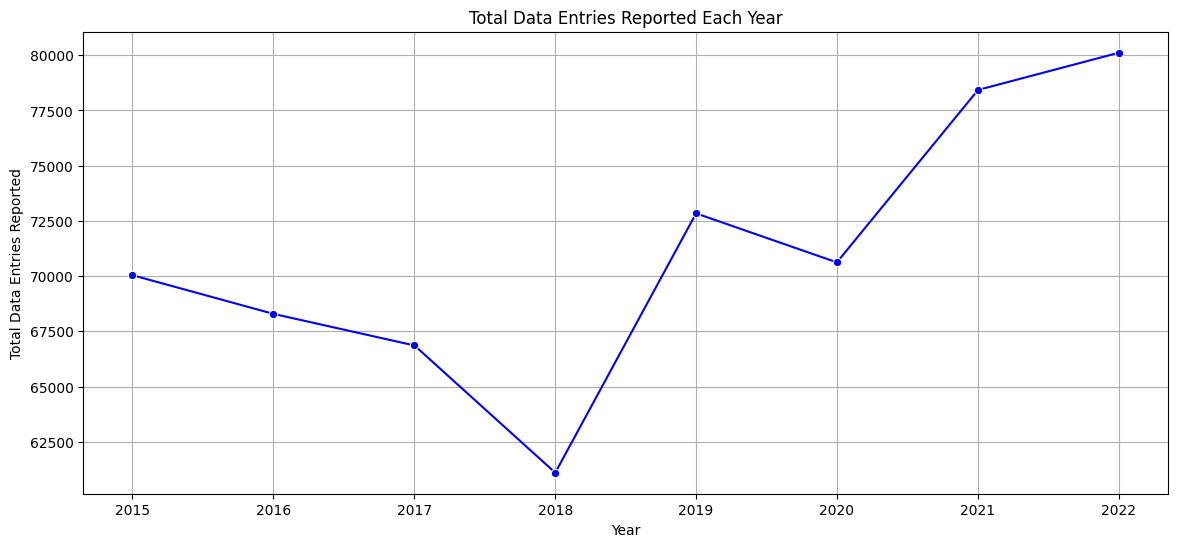

In [20]:
# Plot the total number of reported data entries by year
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_data, x='Year', y='TotalReported', marker='o', color='b')
plt.title('Total Data Entries Reported Each Year')
plt.xlabel('Year')
plt.ylabel('Total Data Entries Reported')
plt.grid(True)
plt.show()

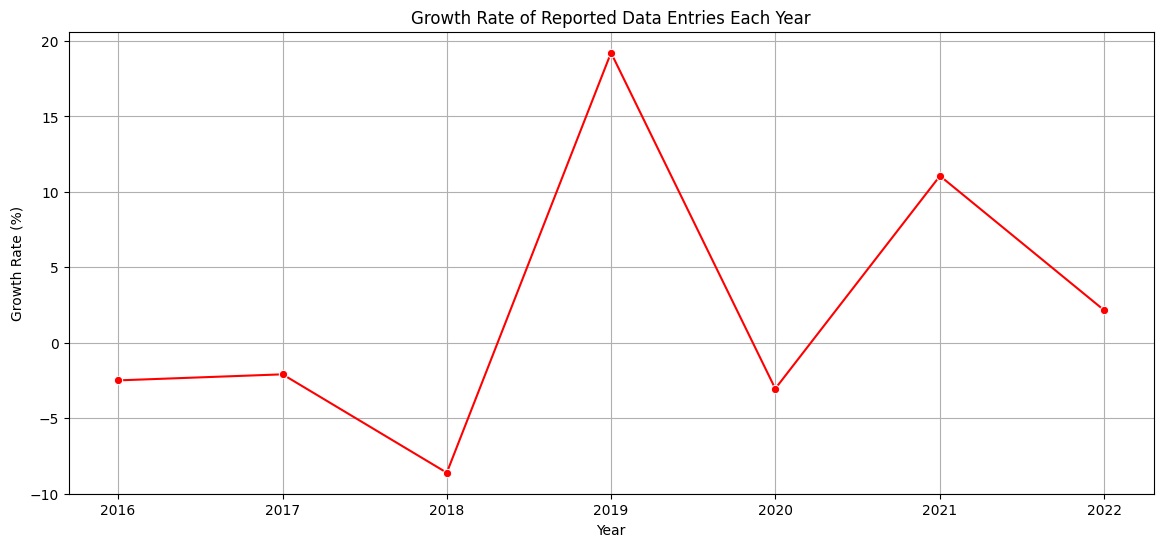

In [14]:
# Calculate the growth rate for each year
yearly_data['GrowthRate'] = yearly_data['TotalReported'].pct_change() * 100  

# Plot the growth rate of reported data entries by year
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_data, x='Year', y='GrowthRate', marker='o', color='r')
plt.title('Growth Rate of Reported Data Entries Each Year')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

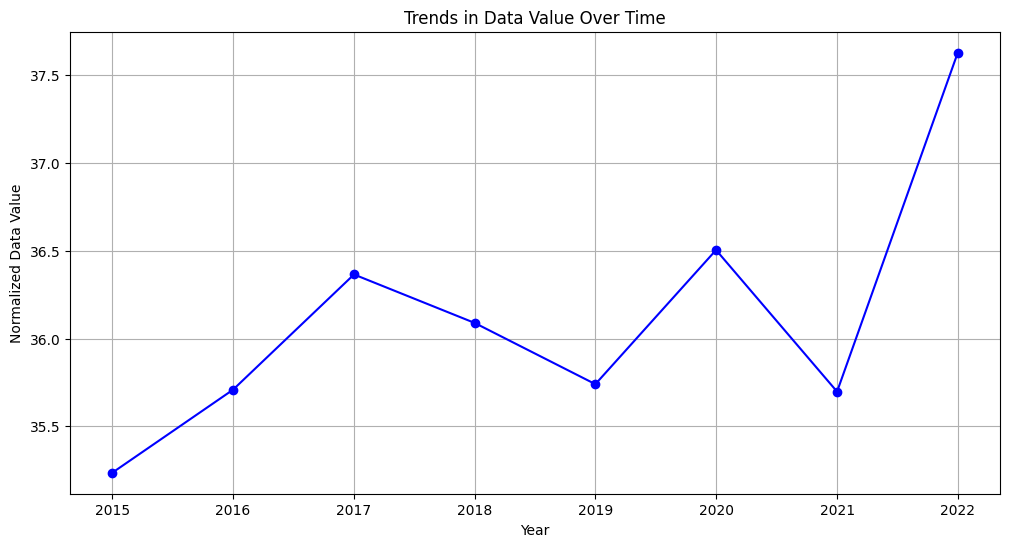

In [34]:
# Group by YearStart and calculate the mean Data_Value
yearly_data = data_cleaned.groupby('YearStart')['Data_Value'].mean().reset_index()

# Plot the trend over the years
plt.figure(figsize=(12,6))
plt.plot(yearly_data['YearStart'], yearly_data['Data_Value'], marker='o', linestyle='-', color='b')
plt.title('Trends in Data Value Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Data Value')
plt.grid(True)
plt.show()


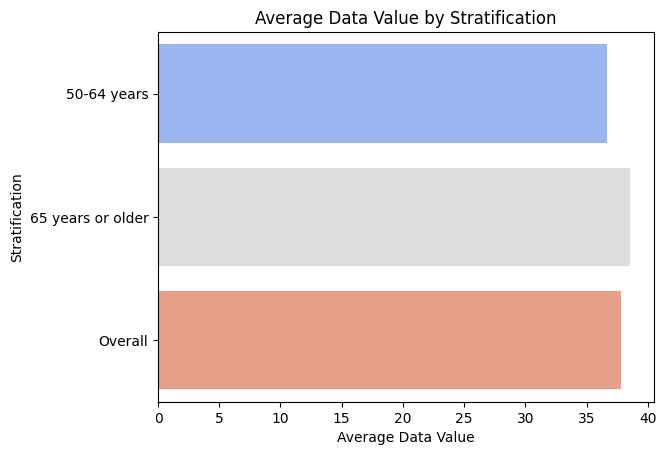

In [22]:
# Aggregate by stratification categories
strat_avg = dataset.groupby('Stratification1')['Data_Value'].mean().reset_index()

# Plot stratification comparison
sns.barplot(data=strat_avg, x='Data_Value', y='Stratification1', hue='Stratification1', palette='coolwarm', legend=False)
plt.title("Average Data Value by Stratification")
plt.xlabel("Average Data Value")
plt.ylabel("Stratification")
plt.show()


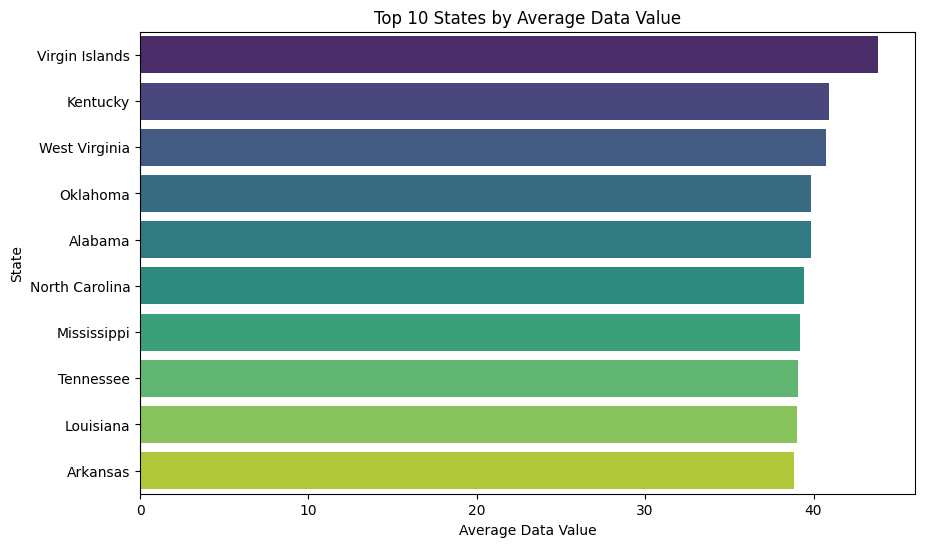

In [23]:
# Aggregate data by location
state_avg = dataset.groupby('LocationDesc')['Data_Value'].mean().reset_index()

# Top 10
top_states = state_avg.sort_values('Data_Value',ascending=False).head(10)

# Visaualizing the data
plt.figure(figsize=(10, 6))
plt.barh(top_states['LocationDesc'], top_states['Data_Value'], color=plt.cm.viridis(range(len(top_states))))

# Add title and labels
sns.barplot(data=top_states, x='Data_Value', y='LocationDesc', hue='LocationDesc', palette='viridis', legend=False)
plt.title("Top 10 States by Average Data Value")
plt.xlabel("Average Data Value")
plt.ylabel("State")
plt.show()

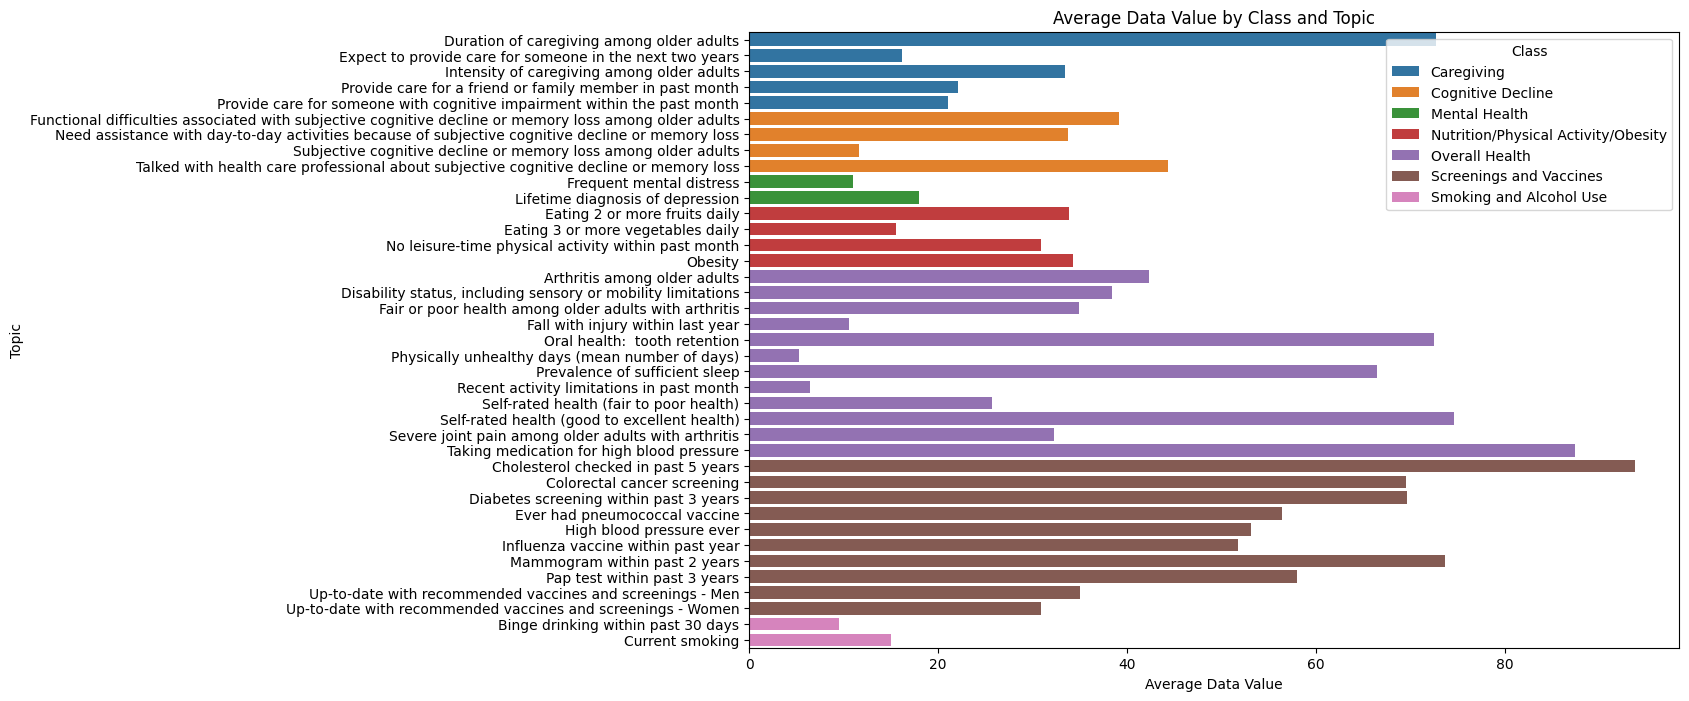

In [24]:
# Aggregate data by class and topic

class_topic_avg = dataset.groupby(['Class','Topic'])['Data_Value'].mean().reset_index()
class_topic_avg

plt.figure(figsize=(12,8))
sns.barplot(data=class_topic_avg, x='Data_Value',y='Topic', hue='Class')
plt.title('Average Data Value by Class and Topic')
plt.xlabel('Average Data Value')
plt.ylabel('Topic')
plt.legend(title='Class')
plt.show()

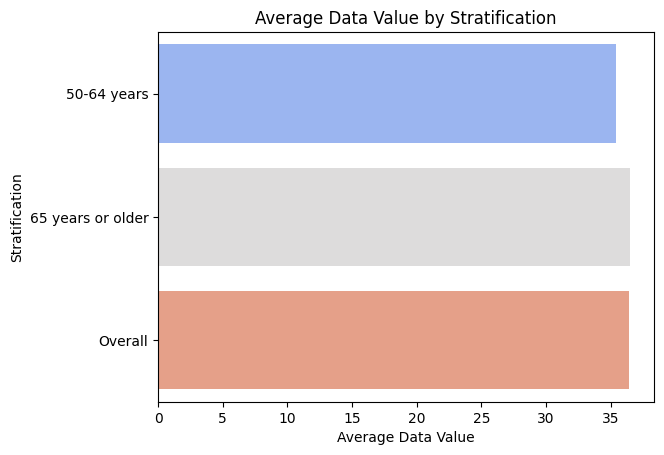

In [17]:
# Aggregate by stratification categories

strat_avg = data_cleaned.groupby('Stratification1')['Data_Value'].mean().reset_index()

# Plot stratification comparison
sns.barplot(data=strat_avg, x='Data_Value', y='Stratification1', hue='Stratification1', palette='coolwarm', legend=False)
plt.title("Average Data Value by Stratification")
plt.xlabel("Average Data Value")
plt.ylabel("Stratification")
plt.show()


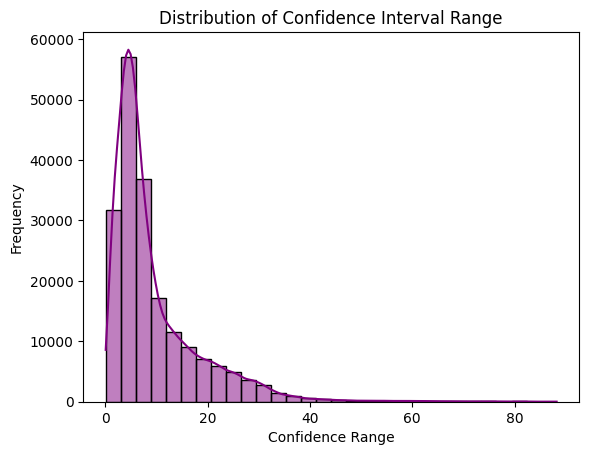

In [18]:
data_cleaned['Confidence_Range'] = data_cleaned['High_Confidence_Limit'] - data_cleaned['Low_Confidence_Limit']


sns.histplot(data_cleaned['Confidence_Range'],kde =True, bins=30, color='purple')
plt.title('Distribution of Confidence Interval Range')
plt.xlabel('Confidence Range')
plt.ylabel('Frequency')
plt.show()

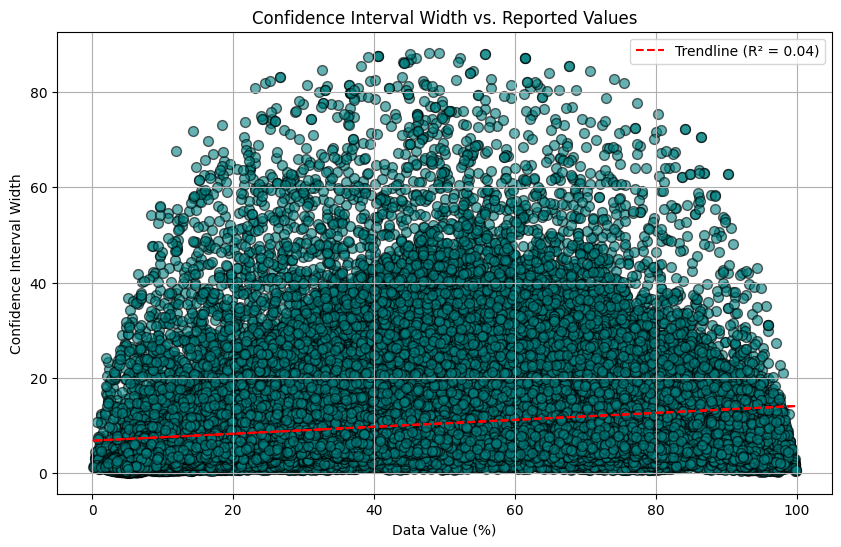

In [19]:
import numpy as np
from scipy.stats import linregress

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Data_Value'], data_cleaned['High_Confidence_Limit'] - data_cleaned['Low_Confidence_Limit'], alpha=0.6, c='teal', edgecolor='k', s=50)

# Trendline
x = data_cleaned['Data_Value']
y = data_cleaned['High_Confidence_Limit'] - data_cleaned['Low_Confidence_Limit']
valid_data = ~np.isnan(x) & ~np.isnan(y)  # Exclude NaN values
slope, intercept, r_value, p_value, std_err = linregress(x[valid_data], y[valid_data])
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Trendline (R² = {r_value**2:.2f})')

# Titles and labels
plt.title('Confidence Interval Width vs. Reported Values')
plt.xlabel('Data Value (%)')
plt.ylabel('Confidence Interval Width')
plt.legend()
plt.grid(True)

plt.show()


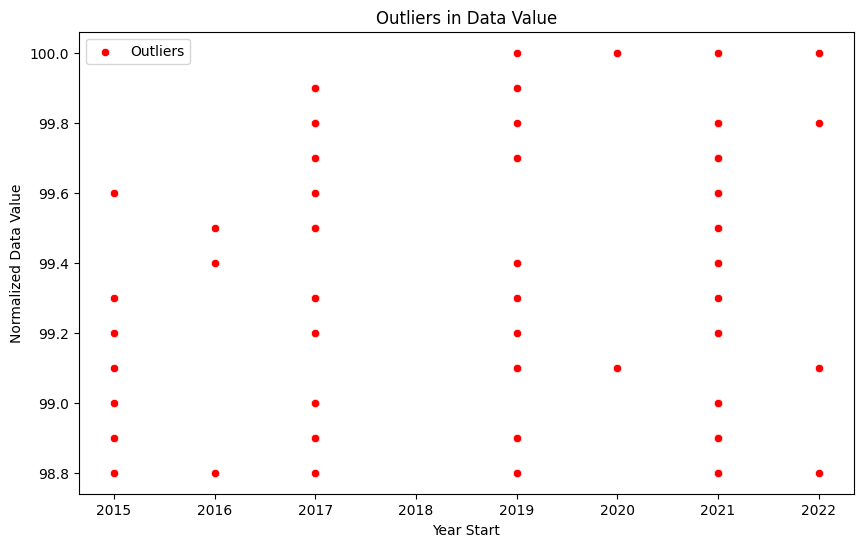

In [36]:
from scipy.stats import zscore

# Calculate Z-scores for Data_Value
data_cleaned['zscore'] = zscore(data_cleaned['Data_Value'])

# Identify outliers with Z-score > 3 or < -3
outliers = data_cleaned[data_cleaned['zscore'].abs() > 3]

# Visualize outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearStart', y='Data_Value', data=outliers, color='red', label='Outliers')
plt.title('Outliers in Data Value')
plt.xlabel('Year Start')
plt.ylabel('Normalized Data Value')
plt.show()
